# Laboratorio 5 

+ Ana Laura Tschen 221645
+ Sebastian Garcia 22291

### 1. Implementación en Python de la función que grafica el campo de direcciones asociado a una ecuación diferencial de primer orden. Los parametros que recibe la función f son xmin, xmax, ymin, ymax de la ventana que se desea graficar y los parámetros xstep y ystep para indicar la separación en la que se quiere subdividir su gri de puntos sobre los ejes x y y. Tambien se influye el parámetro para graficar entre el campo F asociado a la ecuación definida anteriormente o el campo unitario N equivalente.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from sympy import symbols, Function, Eq, dsolve, diff, dsolve, simplify, Matrix, nroots, nsolve, S
from sympy import ln, exp
from sympy.utilities.lambdify import lambdify
from itertools import product

In [2]:
def plot_direction_field(f, xmin, xmax, ymin, ymax, xstep=20, ystep=20, unit=False, stream=False, title=None, ax=None, density=1.0):
 
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 5))
    else:
        fig = ax.figure

    X = np.linspace(xmin, xmax, xstep)
    Y = np.linspace(ymin, ymax, ystep)
    XX, YY = np.meshgrid(X, Y)

    U = np.ones_like(XX)
    V = f(XX, YY)

    if unit:
        L = np.sqrt(U**2 + V**2)
        L[L == 0] = 1.0
        U, V = U/L, V/L

    ax.quiver(XX, YY, U, V, pivot='mid', alpha=0.8)
    if stream:
        ax.streamplot(X, Y, U, V, density=density, color='k', linewidth=0.7, arrowsize=0.8)

    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    if title:
        ax.set_title(title)
    ax.grid(True, alpha=0.3)
    return fig, ax

Ejemplo A: $y' = -xy$

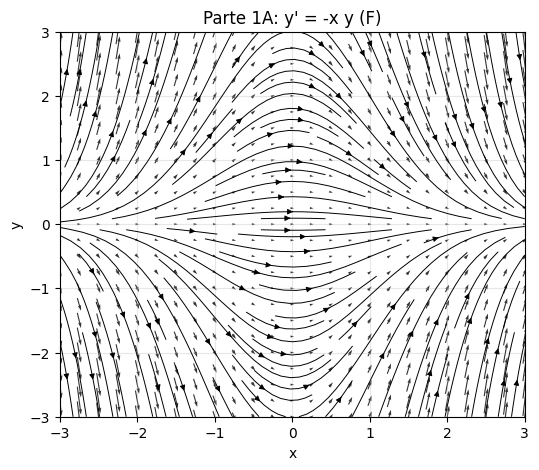

In [ ]:
fA = lambda X, Y: -X*Y
fig1, ax1 = plot_direction_field(fA, xmin=-3, xmax=3, ymin=-3, ymax=3,
                                     xstep=25, ystep=25, unit=False, stream=True,
                                     density=1.2, title="Parte 1A: y' = -x y (F)")

Ejemplo B: $y'=y^2$ (unitario)

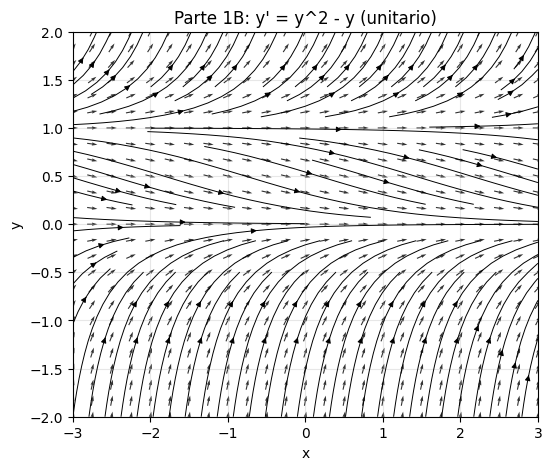

In [6]:
fB = lambda X, Y: Y**2 - Y
fig2, ax2 = plot_direction_field(fB, xmin=-3, xmax=3, ymin=-2, ymax=2,
                                     xstep=25, ystep=25, unit=True, stream=True,
                                     density=1.0, title="Parte 1B: y' = y^2 - y (unitario)")

### 2. Esbozo de las soluciones de la EDO, resolución de la EDO y comparación de la solución obtenida contra la solución esbozada.
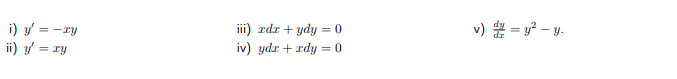

In [7]:
def symbolic_solutions_part2():
    x = symbols('x')
    y = Function('y')

    sols = {}

    # i) y' = -x y
    ode_i = Eq(diff(y(x), x), -x*y(x))
    sols['i'] = simplify(dsolve(ode_i))

    # ii) y' = x y
    ode_ii = Eq(diff(y(x), x), x*y(x))
    sols['ii'] = simplify(dsolve(ode_ii))

    # iii) x dx + y dy = 0  
    sols['iii'] = "x^2 + y^2 = C (circunferencias concéntricas)"

    # iv) y dx + x dy = 0 
    sols['iv'] = "x*y = C (hipérbolas)"

    # v) y' = y^2 - y = y(y-1) (separable)
    # ∫ dy/[y(y-1)] = ∫ dx  => ln|y/(y-1)| = x + C  => y = 1/(1 + K e^{-x})
    C = symbols('C')
    sols['v'] = "y(x) = 1 / (1 + K*exp(-x))"

    return sols

In [9]:
sols2 = symbolic_solutions_part2()
print("Parte 2) Soluciones simbólicas:")
for k, v in sols2.items():
    print(f"{k}) {v}")

Parte 2) Soluciones simbólicas:
i) Eq(y(x), C1*exp(-x**2/2))
ii) Eq(y(x), C1*exp(x**2/2))
iii) x^2 + y^2 = C (circunferencias concéntricas)
iv) x*y = C (hipérbolas)
v) y(x) = 1 / (1 + K*exp(-x))


R: Las soluciones simbólicas son las siguientes:
+ i) $C_{1}*e^{\frac{-x^{2}}{2}}$

### 3. Resolución de la ecuación diferencial $xy''+2y' = 6x$ por medio de la sustitución adecuada. Indicar la región del plano R2 en donde vale el teorema de existencia y unicidad, indicando aquellas regiones en donde no se cumplen. Analizar los puntos donde no se cumple el teorema y lo que ocurre ocn las soluciones.